In [1]:
## Exercise 4 Neural Netwrok Learning

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from scipy.optimize import minimize

In [2]:
## Setup the parameters you will use for this part of the exercise
input_layer_size = 400  # 20x20 Input Images of Digit
hidden_layer_size = 25  # 25 hidden units
num_labels = 10         # 10 labels, from 1 to 10
                        # (note that we have mapped "0" to label 10)

In [3]:
## Part 1: Loading and Visualizing Data

def displayData(X, width=None):    
    if X.ndim == 1:
        X = X.reshape(1, -1)
        
    # Set width automatically if not passed in
    if not width:
        width = round(X.shape[1]**0.5)
        
    # Gray Image
    plt.set_cmap('gray')
    
    # Compute rows, cols
    m, n = X.shape
    height = int(n / width)
    
    # Compute number of items to display
    disp_rows = int(m**0.5)
    disp_cols = int(np.ceil(m / disp_rows))
    
    # Between images padding
    pad = 1
    
    # Setup blank display
    disp_arr = -np.ones((pad + disp_rows * (height + pad), 
                         pad + disp_cols * (width + pad)))
    
    # Copy each example into a patch on the display array
    curr_ex = 0
    for j in range(disp_rows):
        for i in range(disp_cols):
            if curr_ex > (m - 1):
                break
            # Copy the patch
            
            # Get the max value of the patch
            max_val = max(abs(X[curr_ex]))
            
            r = pad + j * (height + pad)
            c = pad + i * (width + pad)
            
            disp_arr[r:r+height, c:c+width] = X[curr_ex].reshape(
                height, width, order='F') / max_val
            
            curr_ex += 1
        if curr_ex > (m - 1):
            break
    
    # Display Image
    h = plt.imshow(disp_arr)
    
    # Do not show axis
    plt.axis('off')
    
    return h, disp_arr

Loading and Visualizing Data ...


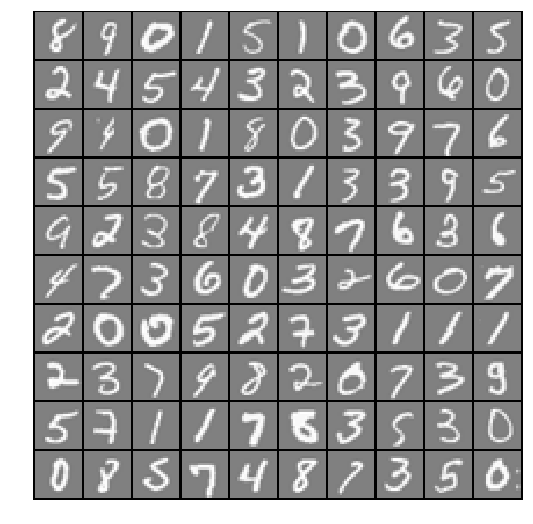

In [4]:
# Load Training Data
print('Loading and Visualizing Data ...')

data = loadmat('../ex4/ex4data1.mat')
X = data['X']
y = data['y'].ravel()
m = len(X)

# Randomly select 100 data points to display
sel = np.random.permutation(m)
sel = sel[:100]

plt.figure(figsize=(9, 9))
displayData(X[sel])
None

In [5]:
## Part 2: Loading Parameters

print('\nLoading Saved Neural Network Parameters ...')

# Load the weights into variables Theta1 and Theta2
data = loadmat('../ex4/ex4weights.mat')
Theta1 = data['Theta1']
Theta2 = data['Theta2']

# Unroll parameters
nn_params = np.r_[Theta1.ravel(order='F'), Theta2.ravel(order='F')]


Loading Saved Neural Network Parameters ...


In [6]:
## Part 3: Compute Cost (Feedforward)

def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g


def sigmoidGradient(z):
    g = sigmoid(z) * (1 - sigmoid(z))
    return g


def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, 
                   num_labels, X, y, lambda_):
    if X.ndim == 1:
        X = X.reshape(1, -1)
    
    # One-Hot encode
    Y = np.eye(num_labels)[y - 1]

    # Reshape nn_params back into the parameters Theta1 and Theta2, 
    # the weights matrices for out 2 layer neural network
    Theta1 = nn_params[:hidden_layer_size * (input_layer_size + 1)].reshape(
        hidden_layer_size, input_layer_size + 1, order='F')
    
    Theta2 = nn_params[hidden_layer_size * (input_layer_size + 1):].reshape(
        num_labels, hidden_layer_size + 1, order='F')
    
    m = len(X)
    
    # Input Layer
    z_1 = X
    a_1 = np.c_[np.ones(m), z_1]
    
    # Hidden Layer
    z_2 = a_1.dot(Theta1.T)
    a_2 = np.c_[np.ones(m), sigmoid(z_2)]
    
    # Output Layer
    z_3 = a_2.dot(Theta2.T)
    a_3 = sigmoid(z_3)
    
    H = a_3
    
    Theta1 = np.c_[np.zeros(hidden_layer_size), Theta1[:, 1:]]
    Theta2 = np.c_[np.zeros(num_labels), Theta2[:, 1:]]
    
    J = sum(np.sum(-Y * np.log(H) - (1 - Y) * np.log(1 - H), axis=1)) / m
    J += lambda_ * (sum(np.sum(Theta1**2, axis=1)) + 
                    sum(np.sum(Theta2**2, axis=1))) / (2 * m)
    
    delta_3 = H - Y
    delta_2 = delta_3.dot(Theta2) * sigmoidGradient(np.c_[np.ones(m), z_2])
    delta_2 = delta_2[:, 1:]
    
    Delta_2 = delta_3.T.dot(a_2)
    Delta_1 = delta_2.T.dot(a_1)
    
    Theta1_grad = Delta_1 / m
    Theta1_grad += lambda_ * Theta1 / m
    
    Theta2_grad = Delta_2 / m
    Theta2_grad += lambda_ * Theta2 / m
    
    grad = np.r_[Theta1_grad.ravel(order='F'), Theta2_grad.ravel(order='F')]
    
    return J, grad

In [7]:
print('\nFeedforward Using Neural Network ...')

# Weight regularization parameter (we this to 0 here).
lambda_ = 0

J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, 
                      num_labels, X, y, lambda_)

print('Cost at parameters (loaded from ex4weights): {:f} '
      '\n(this value should be about 0.287629)'.format(J))


Feedforward Using Neural Network ...
Cost at parameters (loaded from ex4weights): 0.287629 
(this value should be about 0.287629)


In [8]:
## Part 4: Implement Regularization

print('\nChecking Cost Function (w/ Regularization) ...')

# Weight regularization parameter (we set this to 1 here).
lambda_ = 1

J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, 
                      num_labels, X, y, lambda_)

print('Cost at parameters (loaded from ex4weights): {:f} '
      '\n(this value sholud be about 0.383770)'.format(J))


Checking Cost Function (w/ Regularization) ...
Cost at parameters (loaded from ex4weights): 0.383770 
(this value sholud be about 0.383770)


In [9]:
## Part 5: Sigmoid Gradient

print('\nEvaluating sigmoid gradient...')

g = sigmoidGradient(np.array([-1, -0.5, 0, 0.5, 1]))
print('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:')
print('{}\n'.format(g))


Evaluating sigmoid gradient...
Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
[0.19661193 0.23500371 0.25       0.23500371 0.19661193]



In [10]:
## Part 6: Initializing Parameters

def randInitializeWeights(L_in, L_out):
    epsilon_init = (6 / (L_in + L_out))**0.5
    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init
    
    return W

In [11]:
print('\nInitializing Neural Network Parameters ...')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

# Unroll parameters
initial_nn_params = np.r_[initial_Theta1.ravel(order='F'), 
                          initial_Theta2.ravel(order='F')]


Initializing Neural Network Parameters ...


In [12]:
## Part 7: Implement Backpropagation

def debugInitializeWeights(fan_out, fan_in):
    # Set W to zeros
    W = np.zeros((fan_out, 1 + fan_in))
    
    # Initialize W using "sin", this ensures that W is always of the same
    # values and will be useful for debugging
    W = np.sin(np.arange(1, 1 + W.size)).reshape(W.shape, order='F') / 10
    
    return W


def computeNumericalGradient(J, theta):
    numgrad = np.zeros(theta.shape)
    perturb = np.zeros(theta.shape)
    
    e = 1e-4
    
    for p in range(theta.size):
        # Set pertubation vector
        perturb[p] = e
        loss1, _ = J(theta - perturb)
        loss2, _ = J(theta + perturb)
        
        # Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2 * e)
        perturb[p] = 0

    return numgrad

def checkNNGradients(lambda_=0):
    input_layer_size = 3
    hidden_layer_size = 5
    num_labels = 3
    m = 5
    
    # We generate some 'random' test data
    Theta1 = debugInitializeWeights(hidden_layer_size, input_layer_size)
    Theta2 = debugInitializeWeights(num_labels, hidden_layer_size)
    
    # Reusing debugInitializeWeights to generate X
    X = debugInitializeWeights(m, input_layer_size - 1)
    y = 1 + np.arange(1, m + 1) % num_labels
    
    # Unroll parameters
    nn_params = np.r_[Theta1.ravel(order='F'), Theta2.ravel(order='F')]
    
    # Short hand for cost function
    costFunc = lambda p: nnCostFunction(p, input_layer_size, hidden_layer_size, 
                                        num_labels, X, y, lambda_)
    
    cost, grad = costFunc(nn_params)
    numgrad = computeNumericalGradient(costFunc, nn_params)
    
    # Visually examine the two gradient computations.
    # the two columns you get should be very similar.
    print(np.c_[numgrad, grad])
    print('The above two columns you get should be very similar.\n'
          '(Left-Your Numerical Gradient, Right-Analytical Gradient)\n')
    
    # Evaluate the norm of the difference between two solutions.
    # If you have a correct implementation, and assuming you used EPSILON 1e-4
    diff = np.linalg.norm(numgrad - grad) / np.linalg.norm(numgrad + grad)
    
    print('If your backpropagation implementation is correct, then\n ' 
          'the relative difference will be small (less than 1e-9). \n' 
          '\nRelative Difference: {}'.format(diff))

In [13]:
print('\nChecking Backpropagation... ')

# Check gradients by running checkNNGradients
checkNNGradients()


Checking Backpropagation... 
[[-9.27825235e-03 -9.27825236e-03]
 [ 8.89911959e-03  8.89911960e-03]
 [-8.36010761e-03 -8.36010762e-03]
 [ 7.62813551e-03  7.62813551e-03]
 [-6.74798369e-03 -6.74798370e-03]
 [-3.04978709e-06 -3.04978914e-06]
 [ 1.42869427e-05  1.42869443e-05]
 [-2.59383071e-05 -2.59383100e-05]
 [ 3.69883213e-05  3.69883234e-05]
 [-4.68759764e-05 -4.68759769e-05]
 [-1.75060082e-04 -1.75060082e-04]
 [ 2.33146358e-04  2.33146357e-04]
 [-2.87468729e-04 -2.87468729e-04]
 [ 3.35320349e-04  3.35320347e-04]
 [-3.76215585e-04 -3.76215587e-04]
 [-9.62660618e-05 -9.62660620e-05]
 [ 1.17982666e-04  1.17982666e-04]
 [-1.37149709e-04 -1.37149706e-04]
 [ 1.53247077e-04  1.53247082e-04]
 [-1.66560294e-04 -1.66560294e-04]
 [ 3.14544970e-01  3.14544970e-01]
 [ 1.11056588e-01  1.11056588e-01]
 [ 9.74006970e-02  9.74006970e-02]
 [ 1.64090819e-01  1.64090819e-01]
 [ 5.75736493e-02  5.75736493e-02]
 [ 5.04575855e-02  5.04575855e-02]
 [ 1.64567932e-01  1.64567932e-01]
 [ 5.77867378e-02  5.7786

In [14]:
## Part 8: Implement Regularization

print('\nChecking Backpropagation (w/ Regularization) ... ')

# Check gradients by running checkNNGradients
lambda_ = 3
checkNNGradients(lambda_)

# Also output the costFunction debugging values
debug_J, _ = nnCostFunction(nn_params, input_layer_size, 
                            hidden_layer_size, num_labels, X, y, lambda_)

print('\n\nCost at (fixed) debugging parameters (w/ lambda = {:.1f}): {:.6f} ' 
      '\n(for lambda = 3, this value should be about 0.576051)\n'.format(
          lambda_, debug_J))


Checking Backpropagation (w/ Regularization) ... 
[[-9.27825235e-03 -9.27825236e-03]
 [ 8.89911959e-03  8.89911960e-03]
 [-8.36010761e-03 -8.36010762e-03]
 [ 7.62813551e-03  7.62813551e-03]
 [-6.74798369e-03 -6.74798370e-03]
 [-1.67679797e-02 -1.67679797e-02]
 [ 3.94334829e-02  3.94334829e-02]
 [ 5.93355565e-02  5.93355565e-02]
 [ 2.47640974e-02  2.47640974e-02]
 [-3.26881426e-02 -3.26881426e-02]
 [-6.01744725e-02 -6.01744725e-02]
 [-3.19612287e-02 -3.19612287e-02]
 [ 2.49225535e-02  2.49225535e-02]
 [ 5.97717617e-02  5.97717617e-02]
 [ 3.86410548e-02  3.86410548e-02]
 [-1.73704651e-02 -1.73704651e-02]
 [-5.75658668e-02 -5.75658668e-02]
 [-4.51963845e-02 -4.51963845e-02]
 [ 9.14587966e-03  9.14587966e-03]
 [ 5.46101547e-02  5.46101547e-02]
 [ 3.14544970e-01  3.14544970e-01]
 [ 1.11056588e-01  1.11056588e-01]
 [ 9.74006970e-02  9.74006970e-02]
 [ 1.18682669e-01  1.18682669e-01]
 [ 3.81928666e-05  3.81928696e-05]
 [ 3.36926556e-02  3.36926556e-02]
 [ 2.03987128e-01  2.03987128e-01]
 [ 1

In [15]:
## Part 9: Training NN

print('\nTraining Neural Network...')

# After you have completed the assignment, change the MaxIter to a larger
# value to see how more training helps.
optimset = {'disp': True, 'maxiter': 5000}

# You should also try different values of lambda
lambda_ = 1

# Create "short hand" for the cost function to be minimized
costFunction = lambda p: nnCostFunction(p, 
                                        input_layer_size, 
                                        hidden_layer_size, 
                                        num_labels, X, y, lambda_)

# Now, costFunction is a function that takes in only one argument
# (the neural network parameters)
result = minimize(costFunction, initial_nn_params, 
                  method='CG', jac=True, options=optimset)
nn_params = result['x']
cost = result['fun']

# Obtain Theta1 and Theta2 back from nn_params
Theta1 = nn_params[:hidden_layer_size * (input_layer_size + 1)].reshape(
    hidden_layer_size, input_layer_size + 1, order='F')
Theta2 = nn_params[hidden_layer_size * (input_layer_size + 1):].reshape(
    num_labels, hidden_layer_size + 1, order='F')


Training Neural Network...
Optimization terminated successfully.
         Current function value: 0.304398
         Iterations: 2562
         Function evaluations: 6084
         Gradient evaluations: 6084



Visualizing Neural Network... 


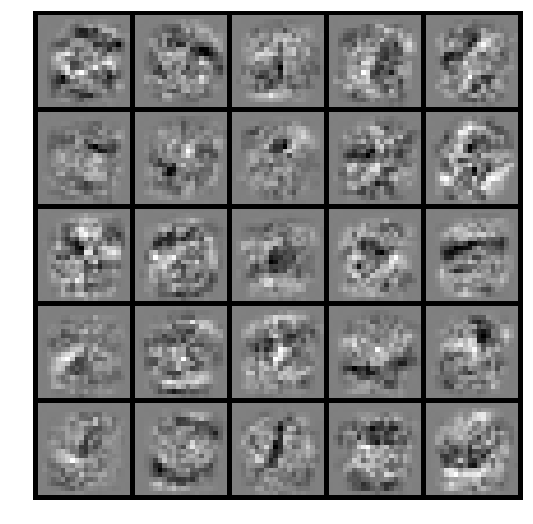

In [16]:
## Part 10: Visualize Weights

print('\nVisualizing Neural Network... ')

plt.figure(figsize=(9, 9))
displayData(Theta1[:, 1:])
None

In [17]:
## Part 11: Implement Predict

def predict(Theta1, Theta2, X):
    if X.ndim == 1:
        X = X.reshape(1, -1)
        
    m = len(X)
    num_labels = len(Theta2)
    
    # Input Layer
    z_1 = X
    a_1 = np.c_[np.ones(m), z_1]
    
    # Hidden Layer
    z_2 = a_1.dot(Theta1.T)
    a_2 = np.c_[np.ones(m), sigmoid(z_2)]
    
    # Output Layer
    z_3 = a_2.dot(Theta2.T)
    a_3 = sigmoid(z_3)
    
    H = a_3
    
    p = np.argmax(H, axis=1)
    
    if m == 1:
        p = p.squeeze()
    
    return p + 1

In [18]:
pred = predict(Theta1, Theta2, X)

print('\nTraining Set Accuracy: {:.1f}'.format(np.mean(pred == y) * 100))


Training Set Accuracy: 99.6
